# Kaggle Competition - Quant & Machine Learning Course
# Tutorial 5: Cross validation

Modified based on resource https://github.com/amueller/ml-workshop-2-of-4/blob/master/notebooks/02%20-%20Cross-validation%20and%20Grid%20Search.ipynb

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
sklearn.set_config(print_changed_only=True)

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.data.shape)
print(digits.data)
print(digits.target.shape)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797,)
[0 1 2 ... 8 9 8]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
# test_size, train_size, if null defaul is 25% test

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(450/(450+1347))

(1347, 64)
(1347,)
(450, 64)
(450,)
0.25041736227045075


# Example of CV using K nearest neighbor classifier
- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- default n_neighbors=5

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)     # fit - train model
model.predict(X_test)           # predict - predict on test 
model.score(X_test, y_test)     # get accuracy score for this model prediction

0.9888888888888889

In [9]:
y_pred = model.predict(X_test)
print(y_pred)

[0 3 6 4 5 5 4 7 8 4 1 2 9 9 5 1 1 5 1 4 5 6 4 8 1 9 7 5 9 7 5 8 6 1 5 7 8
 8 9 4 4 5 6 4 8 6 6 1 3 6 3 4 8 0 7 7 7 4 5 3 8 3 5 3 7 9 1 2 9 6 0 1 3 6
 6 7 8 9 4 3 2 9 4 3 2 0 0 4 7 1 3 6 5 7 3 5 5 7 8 0 3 8 6 7 5 5 1 5 7 3 5
 9 8 0 8 2 0 5 3 7 3 1 8 0 9 4 7 0 2 3 4 1 4 6 3 0 8 1 9 8 3 8 8 1 4 4 9 2
 2 2 9 5 4 6 0 9 6 2 1 6 0 5 9 1 7 2 8 2 4 8 5 5 0 7 4 5 9 3 3 2 4 2 8 5 8
 7 3 9 8 3 0 9 5 0 9 1 2 4 8 1 1 6 4 8 8 2 7 9 4 3 6 9 0 1 6 5 7 7 4 7 6 7
 1 8 2 7 8 4 9 4 8 7 9 6 6 6 7 9 1 5 5 5 2 2 6 5 3 5 7 0 3 8 4 3 6 8 4 1 8
 6 3 3 4 9 4 4 5 4 0 2 1 2 3 8 3 5 7 0 2 9 7 5 3 8 9 7 1 4 2 8 0 9 0 3 0 1
 7 1 8 4 9 0 0 7 5 0 8 8 8 2 6 2 1 1 8 9 1 6 6 1 1 6 7 1 0 1 2 6 2 9 7 5 4
 6 4 1 4 7 0 4 5 2 2 4 7 0 3 5 1 5 4 7 9 7 9 0 7 6 5 7 8 5 6 4 5 5 8 4 4 1
 8 0 3 3 5 8 2 3 4 0 4 9 5 9 1 0 9 4 3 5 0 5 3 2 9 1 3 2 5 8 2 6 9 7 5 0 0
 3 6 2 6 3 8 9 3 4 9 9 1 0 6 6 9 0 6 4 7 8 6 8 5 1 3 0 0 2 8 0 2 2 0 5 2 4
 2 6 5 7 2 8]


In [10]:
print(y_test)

[0 3 6 4 5 5 4 7 8 4 1 2 9 9 5 1 1 5 1 4 5 6 4 8 1 9 7 5 9 7 5 8 6 1 5 7 8
 8 9 4 4 5 6 4 8 6 6 1 3 6 3 4 9 0 7 7 7 4 5 3 8 3 5 3 7 9 1 2 9 6 0 1 3 6
 6 7 8 9 4 3 2 9 4 3 2 0 0 4 7 1 3 6 5 7 3 5 5 2 8 0 3 8 6 7 5 5 1 5 7 3 5
 9 8 0 8 2 0 5 3 7 3 1 8 0 9 4 7 0 2 3 4 1 4 6 3 0 8 1 9 8 3 8 8 1 4 4 9 2
 2 2 9 5 4 6 0 9 6 2 1 6 0 5 9 1 7 2 8 2 4 8 5 5 0 7 4 5 9 3 3 2 4 2 8 5 8
 7 3 9 8 3 0 9 5 0 9 1 2 4 8 1 1 6 4 8 4 2 7 9 4 3 6 9 0 1 6 5 7 7 4 7 6 7
 1 8 2 7 8 9 9 4 8 7 9 6 6 6 7 9 1 5 5 5 2 2 6 5 3 5 7 0 3 8 4 3 6 8 4 1 8
 6 3 3 4 9 4 4 5 4 0 2 1 2 3 8 3 5 7 0 2 9 7 5 3 8 9 7 1 4 2 8 0 9 0 3 0 1
 7 1 8 4 9 0 0 7 5 0 8 8 8 2 6 2 1 1 8 9 1 6 6 1 1 6 7 1 0 1 2 6 2 9 7 5 4
 6 4 1 4 7 0 4 5 2 2 4 7 0 3 5 1 5 4 7 3 7 9 0 7 6 5 7 8 5 6 4 5 5 8 4 4 1
 8 0 3 3 5 8 2 3 4 0 4 9 5 9 1 0 9 4 3 5 0 5 3 2 9 1 3 2 5 8 2 6 9 7 5 0 0
 3 6 2 6 3 8 9 3 4 9 9 1 0 6 6 9 0 6 4 7 8 6 8 5 1 3 0 0 2 8 0 2 2 0 5 2 4
 2 6 5 7 2 8]


In [11]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5) #n_neighbors=5

array([0.98518519, 0.98888889, 0.9739777 , 0.97026022, 0.98513011])

### Try other parameters n_neighbors = 3, or 10

In [12]:
k3  = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv=5) #n_neighbors=3
k5  = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=5) #n_neighbors=5
k10 = cross_val_score(KNeighborsClassifier(n_neighbors=10), X_train, y_train, cv=5) #n_neighbors=5

print(k3.mean())
print(k5.mean())
print(k10.mean())

0.98514663362247
0.9806884207627702
0.974002478314746


# Some more advanced CV functions
- for classifier, cv default to StratifiedKFold (automatically make different classes distributed evenly)
- otherwise, cv default to KFold (with No shuffle)

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold

In [14]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=StratifiedKFold(n_splits=5))

array([0.98518519, 0.98888889, 0.9739777 , 0.97026022, 0.98513011])

In [15]:
cross_val_score(KNeighborsClassifier(),
                X_train, y_train, cv=KFold(n_splits=5))

array([0.97777778, 0.9962963 , 0.96282528, 0.97769517, 0.98884758])

In [16]:
len(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)))

50

Grid Search
=================

Grid-Search using Support vector machine classifier as example

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Define parameter grid:

In [18]:
import numpy as np

param_grid = {'C': 10. ** np.arange(-3, 3),
              'gamma' : 10. ** np.arange(-5, 0)}

np.set_printoptions(suppress=True)
print(param_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [19]:
grid_search = GridSearchCV(SVC(), param_grid, verbose=3)
# CV default to be 5 Fold

A GridSearchCV object behaves just like a normal classifier.

In [20]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..............C=0.001, gamma=1e-05;, score=0.104 total time=   0.3s
[CV 2/5] END ..............C=0.001, gamma=1e-05;, score=0.104 total time=   0.2s
[CV 3/5] END ..............C=0.001, gamma=1e-05;, score=0.279 total time=   0.2s
[CV 4/5] END ..............C=0.001, gamma=1e-05;, score=0.104 total time=   0.2s
[CV 5/5] END ..............C=0.001, gamma=1e-05;, score=0.104 total time=   0.2s
[CV 1/5] END .............C=0.001, gamma=0.0001;, score=0.104 total time=   0.2s
[CV 2/5] END .............C=0.001, gamma=0.0001;, score=0.104 total time=   0.2s
[CV 3/5] END .............C=0.001, gamma=0.0001;, score=0.286 total time=   0.2s
[CV 4/5] END .............C=0.001, gamma=0.0001;, score=0.104 total time=   0.2s
[CV 5/5] END .............C=0.001, gamma=0.0001;, score=0.104 total time=   0.2s
[CV 1/5] END ..............C=0.001, gamma=0.001;, score=0.104 total time=   0.2s
[CV 2/5] END ..............C=0.001, gamma=0.001

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]),
                         'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
             verbose=3)

In [21]:
grid_search.predict(X_test)

array([0, 3, 6, 4, 5, 5, 4, 7, 8, 4, 1, 2, 9, 9, 5, 1, 1, 5, 1, 4, 5, 6,
       4, 8, 1, 9, 7, 5, 9, 7, 5, 8, 6, 1, 5, 7, 8, 8, 5, 4, 4, 5, 6, 4,
       8, 6, 6, 1, 3, 6, 3, 4, 9, 0, 7, 7, 7, 4, 5, 3, 8, 3, 5, 3, 7, 9,
       1, 2, 9, 6, 0, 1, 3, 6, 6, 7, 8, 9, 4, 3, 2, 9, 4, 3, 2, 0, 0, 4,
       7, 1, 3, 6, 5, 7, 3, 5, 5, 2, 8, 0, 3, 8, 6, 7, 5, 5, 1, 5, 7, 3,
       5, 9, 8, 0, 8, 2, 0, 5, 3, 7, 3, 1, 8, 0, 9, 4, 7, 0, 2, 3, 4, 1,
       4, 6, 3, 0, 8, 1, 9, 8, 3, 8, 8, 1, 4, 4, 9, 2, 2, 2, 9, 5, 4, 6,
       0, 9, 6, 2, 1, 6, 0, 5, 9, 1, 7, 2, 8, 2, 4, 8, 5, 5, 0, 7, 4, 5,
       9, 3, 3, 2, 4, 2, 8, 5, 8, 7, 3, 9, 8, 3, 0, 9, 5, 0, 9, 1, 2, 4,
       8, 1, 1, 6, 4, 8, 4, 2, 7, 9, 4, 3, 6, 9, 0, 1, 6, 5, 7, 7, 4, 7,
       6, 7, 1, 8, 2, 7, 8, 7, 9, 4, 8, 7, 9, 6, 6, 6, 7, 9, 1, 5, 5, 5,
       2, 2, 6, 5, 3, 5, 7, 0, 3, 8, 4, 3, 6, 8, 4, 1, 8, 6, 3, 3, 4, 9,
       4, 4, 5, 4, 0, 2, 1, 2, 3, 8, 3, 5, 7, 0, 2, 9, 7, 5, 3, 8, 9, 7,
       1, 4, 2, 8, 0, 9, 0, 3, 0, 1, 7, 1, 8, 4, 9,

In [22]:
y_test

array([0, 3, 6, 4, 5, 5, 4, 7, 8, 4, 1, 2, 9, 9, 5, 1, 1, 5, 1, 4, 5, 6,
       4, 8, 1, 9, 7, 5, 9, 7, 5, 8, 6, 1, 5, 7, 8, 8, 9, 4, 4, 5, 6, 4,
       8, 6, 6, 1, 3, 6, 3, 4, 9, 0, 7, 7, 7, 4, 5, 3, 8, 3, 5, 3, 7, 9,
       1, 2, 9, 6, 0, 1, 3, 6, 6, 7, 8, 9, 4, 3, 2, 9, 4, 3, 2, 0, 0, 4,
       7, 1, 3, 6, 5, 7, 3, 5, 5, 2, 8, 0, 3, 8, 6, 7, 5, 5, 1, 5, 7, 3,
       5, 9, 8, 0, 8, 2, 0, 5, 3, 7, 3, 1, 8, 0, 9, 4, 7, 0, 2, 3, 4, 1,
       4, 6, 3, 0, 8, 1, 9, 8, 3, 8, 8, 1, 4, 4, 9, 2, 2, 2, 9, 5, 4, 6,
       0, 9, 6, 2, 1, 6, 0, 5, 9, 1, 7, 2, 8, 2, 4, 8, 5, 5, 0, 7, 4, 5,
       9, 3, 3, 2, 4, 2, 8, 5, 8, 7, 3, 9, 8, 3, 0, 9, 5, 0, 9, 1, 2, 4,
       8, 1, 1, 6, 4, 8, 4, 2, 7, 9, 4, 3, 6, 9, 0, 1, 6, 5, 7, 7, 4, 7,
       6, 7, 1, 8, 2, 7, 8, 9, 9, 4, 8, 7, 9, 6, 6, 6, 7, 9, 1, 5, 5, 5,
       2, 2, 6, 5, 3, 5, 7, 0, 3, 8, 4, 3, 6, 8, 4, 1, 8, 6, 3, 3, 4, 9,
       4, 4, 5, 4, 0, 2, 1, 2, 3, 8, 3, 5, 7, 0, 2, 9, 7, 5, 3, 8, 9, 7,
       1, 4, 2, 8, 0, 9, 0, 3, 0, 1, 7, 1, 8, 4, 9,

In [23]:
grid_search.score(X_test, y_test)

0.9933333333333333

In [24]:
grid_search.best_estimator_

SVC(C=10.0, gamma=0.001)

In [25]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.001}

In [26]:
grid_search.best_score_ 
# Mean cross-validated score of the best_estimator

0.9881178576345861

In [27]:
cv_best = cross_val_score(SVC(C=10.0, gamma=0.001), X_train, y_train, cv=5)
print(cv_best.mean())

0.9881178576345861


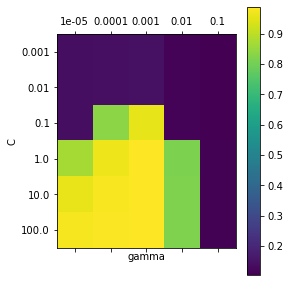

In [28]:
# We extract just the scores

scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

In [29]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results(['mean_test_score'])

TypeError: 'DataFrame' object is not callable